<a href="https://colab.research.google.com/github/SedatDikbas/tag-count-and-wordcloud/blob/main/tag_cloud_steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: data.csv dosyamdaki name kolonundaki kelimelerin countını tutan ve en çok geçen anlamlı 100 kelimeyi csv dosyama sayısıyla birlikte kaydet dosya adını da name_tag yap bağlaçları rakamları ve sayıları görmezden gel  a an the gibi kalıpları da görmezden gel

import pandas as pd
import re
from collections import Counter

def count_words_in_column(csv_file, column_name, output_file='name_tag.csv', top_n=100):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    words = []
    for value in df[column_name]:
        if isinstance(value, str):  # Check if the value is a string
          # Remove numbers, punctuation, and convert to lowercase
          cleaned_text = re.sub(r'[^a-zA-Z\s]', '', value).lower()

          # Split into words and ignore short words and stop words
          for word in cleaned_text.split():
              if len(word) > 2 and word not in ["a", "an", "the", "and", "or", "of"]:
                  words.append(word)

    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)

    # Create a DataFrame for the top words
    top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

    top_words_df.to_csv(output_file, index=False)

    print(f"Top {top_n} words saved to '{output_file}'.")

# Example usage (replace with your actual file and column name)
count_words_in_column('data.csv', 'name')

Top 100 words saved to 'name_tag.csv'.


Top 100 words saved to 'name_tag.csv'.
Wordcloud saved as 'name_tag_cloud.png'


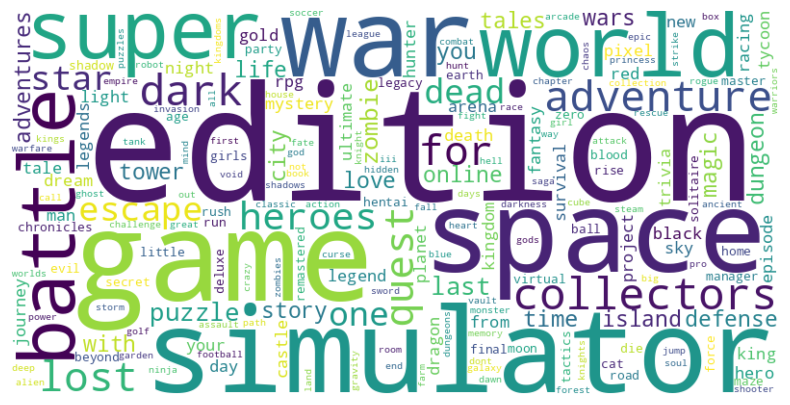

In [ ]:
# prompt: data.csv dosyamdaki name kolonundaki kelimelerin countını tutan ve en çok geçen anlamlı  csv dosyama sayısıyla birlikte kaydet dosya adını da name_tag yap bağlaçları rakamları ve sayıları görmezden gel  a an the gibi kalıpları da görmezden gel ve name tag bulutu oluştur png olarak kaydet

import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def count_words_in_column(csv_file, column_name, output_file='name_tag.csv', top_n=100):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    words = []
    for value in df[column_name]:
        if isinstance(value, str):  # Check if the value is a string
          # Remove numbers, punctuation, and convert to lowercase
          cleaned_text = re.sub(r'[^a-zA-Z\s]', '', value).lower()

          # Split into words and ignore short words and stop words
          for word in cleaned_text.split():
              if len(word) > 2 and word not in ["a", "an", "the", "and", "or", "of"]:
                  words.append(word)

    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)

    # Create a DataFrame for the top words
    top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

    top_words_df.to_csv(output_file, index=False)

    print(f"Top {top_n} words saved to '{output_file}'.")

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('name_tag_cloud.png') # Save the wordcloud as PNG
    print("Wordcloud saved as 'name_tag_cloud.png'")

# Example usage (replace with your actual file and column name)
count_words_in_column('data.csv', 'name')

In [ ]:
# prompt: data.csv dosyamdaki steamspy_tags, genres ve categories alanlarını birleştirmek ve veri setini güncellemek istiyorum birleştirirken aynı kelimeler tekrar geçmesin sadece 1 kez yaz ve union_genres dosyasına kaydet diğer kolonlarla birlikte kaydet

import pandas as pd

def combine_columns(csv_file, output_file='union_genres.csv'):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    # Check if required columns exist
    required_cols = ['steamspy_tags', 'genres', 'categories']
    if not all(col in df.columns for col in required_cols):
        print("Error: One or more required columns are missing in the CSV file.")
        return

    # Function to combine and remove duplicates
    def combine_unique(row):
        combined = set()
        for col in required_cols:
            if isinstance(row[col], str):
                combined.update(row[col].split(';'))
        return ';'.join(combined)

    # Apply the function to create a new column
    df['union_genres'] = df.apply(combine_unique, axis=1)

    # Save the updated dataframe to a new csv
    df.to_csv(output_file, index=False)
    print(f"Combined data saved to '{output_file}'")


# Example Usage
combine_columns('data.csv')

Combined data saved to 'union_genres.csv'


In [ ]:
# prompt: dta.csv dosyamdaki union_genres alanındaki taglerin countını say ve tag_count dosyama kaydet ve bu taglerle tag bulutu oluştur

import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def count_tags_and_generate_wordcloud(csv_file, column_name, output_file='tag_count.csv'):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    all_tags = []
    for value in df[column_name]:
        if isinstance(value, str):
            tags = [tag.strip() for tag in value.split(';')]
            all_tags.extend(tags)

    tag_counts = Counter(all_tags)
    tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count'])
    tag_counts_df.to_csv(output_file, index=False)

    print(f"Tag counts saved to '{output_file}'")

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('tag_cloud.png') # Save the wordcloud as PNG
    print("Wordcloud saved as 'tag_cloud.png'")

# Example usage
count_tags_and_generate_wordcloud('dta.csv', 'union_genres')

Error: Column 'union_genres' not found in the CSV file.


In [ ]:
# prompt: union_genres.csv dosyamdaki union_genres alanındaki taglerin countını say ve tag_count dosyama kaydet

import pandas as pd
from collections import Counter

def count_tags(csv_file, column_name, output_file):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    all_tags = []
    for value in df[column_name]:
        if isinstance(value, str):
            all_tags.extend(value.split(';'))

    tag_counts = Counter(all_tags)

    tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['count'])
    tag_counts_df.index.name = 'tag'
    tag_counts_df.to_csv(output_file)

    print(f"Tag counts saved to '{output_file}'")

# Example usage
count_tags('union_genres.csv', 'union_genres', 'tag_count.csv')

Tag counts saved to 'tag_count.csv'


In [ ]:
# prompt: merged_genres dosyamdaki union_genres kolonundaki her bir satırda kaç tane tag olduğunu say ve genres_count alanı ekle genres_count dosyasına kaydet

import pandas as pd

def count_tags_in_row(csv_file, column_name, output_file):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    df['genres_count'] = df[column_name].str.split(';').str.len()
    df.to_csv(output_file, index=False)
    print(f"Genre counts added and saved to '{output_file}'")

# Example usage
count_tags_in_row('merged_genres.csv', 'union_genres', 'genres_count.csv')

Genre counts added and saved to 'genres_count.csv'


In [ ]:
# prompt: genres_count dosyamdaki sum_ratings alanındaki verileri değerleri 1000-5000 arasındaki olanları alıp new_data dosyasında kaydet

import pandas as pd

def filter_and_save_ratings(input_file, output_file, min_rating, max_rating):
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")
        return

    if 'sum_ratings' not in df.columns:
        print(f"Error: 'sum_ratings' column not found in the input file.")
        return

    # Filter data based on sum_ratings
    new_data = df[(df['sum_ratings'] >= min_rating) & (df['sum_ratings'] <= max_rating)]

    # Save to new csv
    new_data.to_csv(output_file, index=False)
    print(f"Filtered data saved to '{output_file}'")

# Example Usage
filter_and_save_ratings('genres_count.csv', 'new_data.csv', 1000, 5000)

Filtered data saved to 'new_data.csv'


Top 100 words saved to 'name_tag.csv'.
Wordcloud saved as 'name_tag_cloud.png'


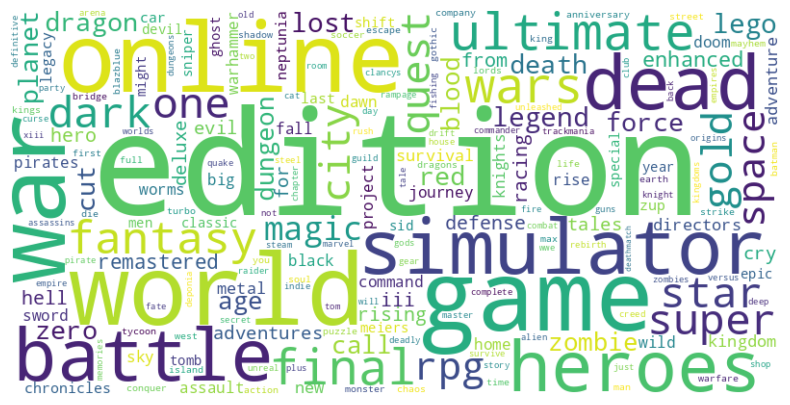

In [ ]:
# prompt: dta.csv dosyamdaki name kolonundaki kelimelerin countını tutan ve en çok geçen anlamlı  csv dosyama sayısıyla birlikte kaydet dosya adını da name_tag yap bağlaçları rakamları ve sayıları görmezden gel  a an the gibi kalıpları da görmezden gel ve name tag bulutu oluştur png olarak kaydet

import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def count_words_in_column(csv_file, column_name, output_file='name_tag.csv', top_n=100):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    words = []
    for value in df[column_name]:
        if isinstance(value, str):
          cleaned_text = re.sub(r'[^a-zA-Z\s]', '', value).lower()
          for word in cleaned_text.split():
              if len(word) > 2 and word not in ["a", "an", "the", "and", "or", "of"]:
                  words.append(word)

    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)

    top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])
    top_words_df.to_csv(output_file, index=False)
    print(f"Top {top_n} words saved to '{output_file}'.")

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('name_tag_cloud.png')
    print("Wordcloud saved as 'name_tag_cloud.png'")

# Example usage
count_words_in_column('dta.csv', 'name')

Top 100 tag counts saved to 'tag_count.csv'
Wordcloud saved as 'tag_cloud.png'


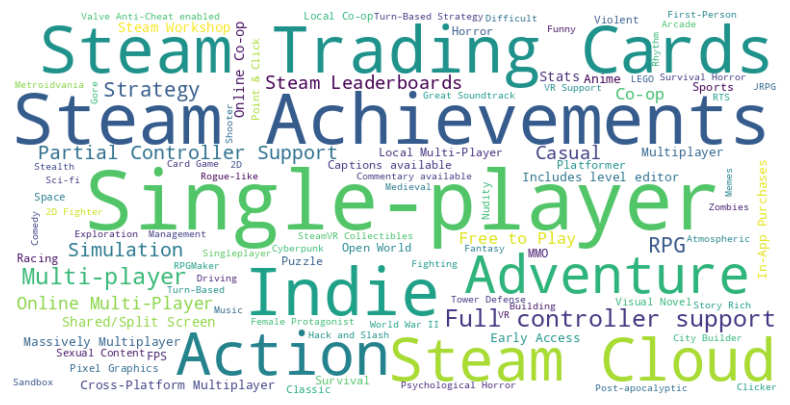

In [ ]:
# prompt: dta.csv dosyamdaki combined_genres alanındaki taglerin countını tut en çok geçen ilk 100 tagın bulutunu oluştur ve csv dosyasına kaydet

import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def count_tags_and_generate_wordcloud(csv_file, column_name, output_file='tag_count.csv', top_n=100):
    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the CSV file.")
        return

    all_tags = []
    for value in df[column_name]:
        if isinstance(value, str):
            tags = [tag.strip() for tag in value.split(';')]
            all_tags.extend(tags)

    tag_counts = Counter(all_tags)

    # Get the top N tags
    top_tags = tag_counts.most_common(top_n)

    tag_counts_df = pd.DataFrame(top_tags, columns=['tag', 'count'])
    tag_counts_df.to_csv(output_file, index=False)

    print(f"Top {top_n} tag counts saved to '{output_file}'")

    # Generate word cloud from the top tags
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_tags))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('tag_cloud.png') # Save the wordcloud as PNG
    print("Wordcloud saved as 'tag_cloud.png'")

# Example usage
count_tags_and_generate_wordcloud('dta.csv', 'combined_genres')